In [1]:
# %load /home/glebi/git/experiment-automation/processing_tools.py
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import scienceplots

plt.style.use(['science', 'russian-font'])

matplotlib.rcParams.update({
    'figure.figsize': [6, 3],
    'savefig.facecolor': 'white',
    'savefig.dpi': 300,
    'figure.dpi': 150.0,
    'font.size': 12.0,
})


In [2]:
data_glass = np.loadtxt("glass_diode.csv", delimiter="\t", skiprows=1)
data_glass = np.sort(data_glass, axis=0)

data_semi = np.loadtxt("semi_diode.csv", delimiter="\t", skiprows=1)
data_semi = np.sort(data_semi, axis=0)

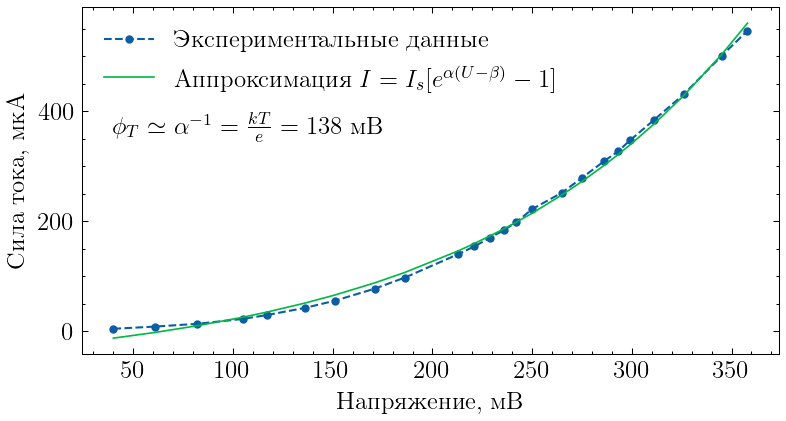

In [3]:
U = data_glass[9:-4].T[0]*1e-3
I = data_glass[9:-4].T[1]*1e-6

I_eq = lambda U, a, b, c: a * (np.exp(b * (U - c)) - 1)
popt, pcov = curve_fit(I_eq, U, I, p0=[.003, .1, .1])

plt.plot(U*1e3, I*1e6, "--.", label="Экспериментальные данные")
plt.plot(U*1e3, I_eq(U, *popt)*1e6, lw=.8, label=r"Аппроксимация $I = I_s [e^{\alpha(U-\beta)} - 1]$")
plt.text(40, 360, r"$\phi_T \simeq \alpha^{-1} = \frac{kT}{e}" + fr" = {1/popt[1]*1e3:.0f}$ мВ")
# plt.text(40, 300, fr"$I_s = {popt[0]*1e6:.1f}$ мкА")
# plt.yscale("log")
plt.xlabel("Напряжение, мВ")
plt.ylabel("Сила тока, мкА")
# plt.title("Экспоненциальный участок ВАХ стеклянного диода")
plt.legend()

plt.savefig("glass-exp.png")
plt.show()

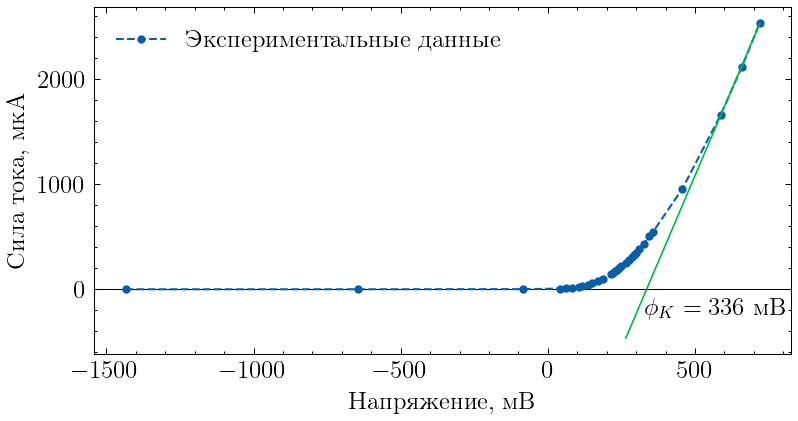

In [4]:
U = data_glass[6:].T[0]*1e-3
I = data_glass[6:].T[1]*1e-6

line = lambda x, k, b: k * x + b
popt, pcov = curve_fit(line, U[-3:], I[-3:])

plt.axhline(0, color='black', linewidth=.5)
plt.plot(U*1e3, I*1e6, "--.", label="Экспериментальные данные")
plt.plot(U[18:]*1e3, line(U, *popt)[18:]*1e6, lw=.8)
plt.text(330, -250, fr"$\phi_K = {-popt[1]/popt[0]*1e3:.0f}$ мВ")
plt.xlabel("Напряжение, мВ")
plt.ylabel("Сила тока, мкА")
# plt.title("ВАХ стеклянного диода")
plt.legend()

plt.savefig("glass-vah.png")
plt.show()

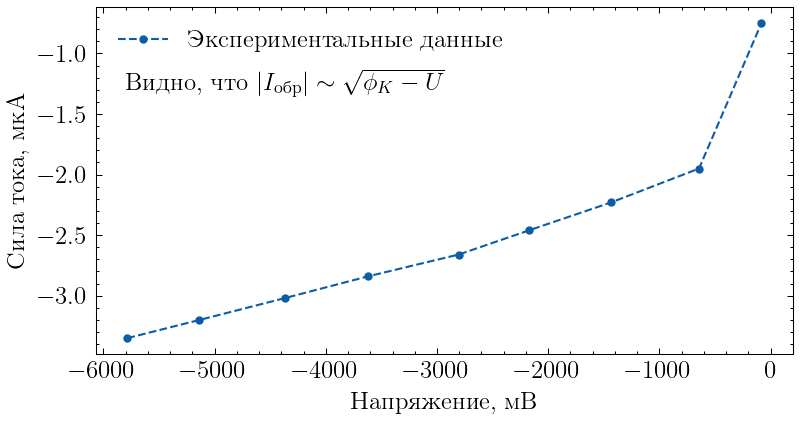

In [5]:
U = data_glass[:9].T[0]*1e-3
I = data_glass[:9].T[1]*1e-6

plt.plot(U*1e3, I*1e6, "--.", label="Экспериментальные данные")
plt.text(-5800, -1.3, r"Видно, что $|I_\text{обр}| \sim \sqrt{\phi_K - U}$")
plt.xlabel("Напряжение, мВ")
plt.ylabel("Сила тока, мкА")
# plt.title("ВАХ стеклянного диода (обратный ход)")
plt.legend()

plt.savefig("glass-back.png")
plt.show()

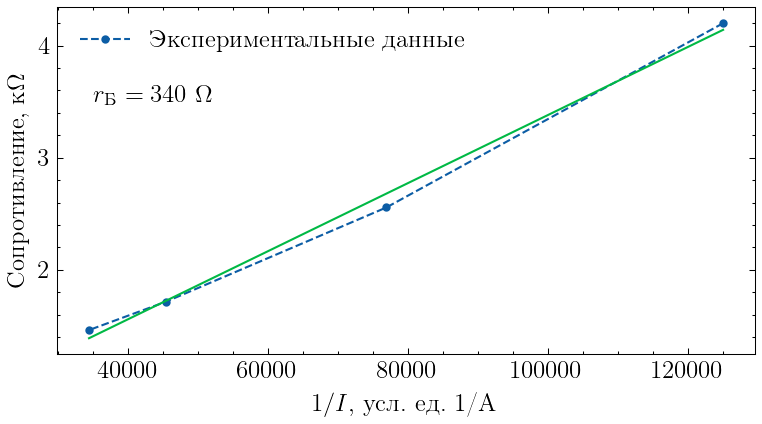

In [6]:
U = data_glass[10:15].T[0]*1e-3
I = data_glass[10:15].T[1]*1e-6

R = np.diff(U) / np.diff(I)
revI = 1/I[:-1]

line = lambda x, k, b: k * x + b
popt, pcov = curve_fit(line, revI, R)

plt.plot(revI, R*1e-3, "--.", label="Экспериментальные данные")
plt.plot(revI, line(revI, *popt)*1e-3)
plt.text(3.5e4, 3.5, r"$r_\text{Б} = " + fr"{popt[1]:.0f} " + r"\text{ }\Omega$")
plt.xlabel(r"$1/I$, усл. ед. 1/А")
plt.ylabel(r"Сопротивление, $\text{к}\Omega$")
# plt.title(r"Зависимость $R = dU/dI$ от $1/I$ стеклянного диода")
plt.legend()

plt.savefig("glass-R.png")
plt.show()

In [7]:
U

array([0.061, 0.082, 0.105, 0.117, 0.136])

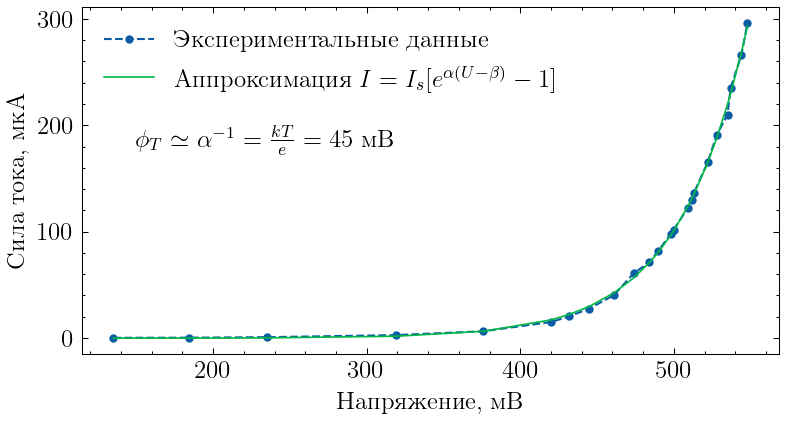

In [8]:
U = data_semi[12:-8].T[0]*1e-3
I = data_semi[12:-8].T[1]*1e-6

I_eq = lambda U, a, b, c: a * (np.exp(b * (U - c)) - 1)
popt, pcov = curve_fit(I_eq, U, I, p0=[1e-6, 20, .1])

plt.plot(U*1e3, I*1e6, "--.", label="Экспериментальные данные")
plt.plot(U*1e3, I_eq(U, *popt)*1e6, lw=.8, label=r"Аппроксимация $I = I_s [e^{\alpha(U-\beta)} - 1]$")
plt.text(150, 180, r"$\phi_T \simeq \alpha^{-1} = \frac{kT}{e}" + fr" = {1/popt[1]*1e3:.0f}$ мВ")
# plt.text(40, 300, fr"$I_s = {popt[0]*1e6:.1f}$ мкА")
# plt.yscale("log")
plt.xlabel("Напряжение, мВ")
plt.ylabel("Сила тока, мкА")
# plt.title("Экспоненциальный участок ВАХ полупроводникового диода")
plt.legend()

plt.savefig("semi-exp.png")
plt.show()

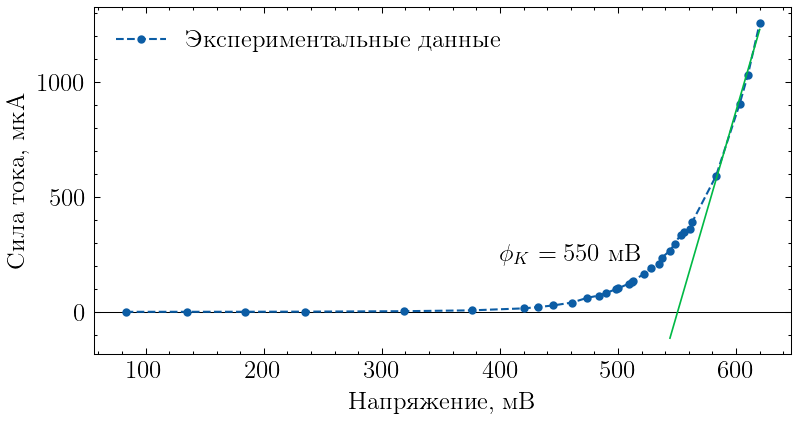

In [9]:
U = data_semi[11:].T[0]*1e-3
I = data_semi[11:].T[1]*1e-6

line = lambda x, k, b: k * x + b
popt, pcov = curve_fit(line, U[-4:], I[-4:])

plt.axhline(0, color='black', linewidth=.5)
plt.plot(U*1e3, I*1e6, "--.", label="Экспериментальные данные")
plt.plot(U[-10:]*1e3, line(U, *popt)[-10:]*1e6, lw=.8)
plt.text(400, 220, fr"$\phi_K = {-popt[1]/popt[0]*1e3:.0f}$ мВ")
plt.xlabel("Напряжение, мВ")
plt.ylabel("Сила тока, мкА")
# plt.title("ВАХ полупроводникового диода")
plt.legend()

plt.savefig("semi-vah.png")
plt.show()

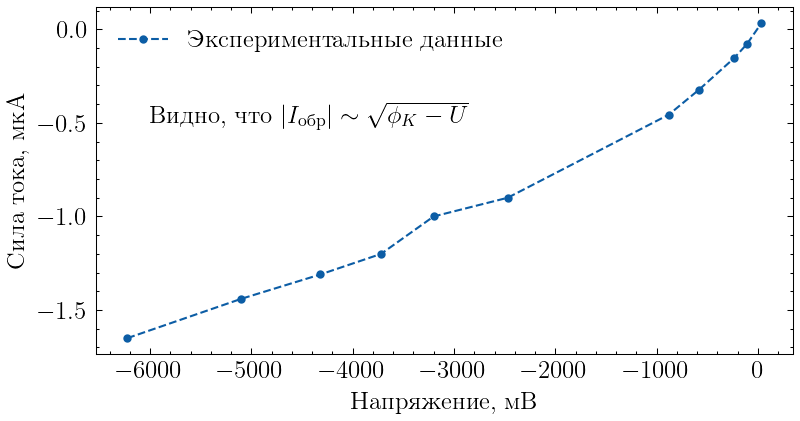

In [10]:
U = data_semi[:11].T[0]*1e-3
I = data_semi[:11].T[1]*1e-6

plt.plot(U*1e3, I*1e6, "--.", label="Экспериментальные данные")
plt.text(-6000, -.5, r"Видно, что $|I_\text{обр}| \sim \sqrt{\phi_K - U}$")
plt.xlabel("Напряжение, мВ")
plt.ylabel("Сила тока, мкА")
# plt.title("ВАХ полупроводникового диода (обратный ход)")
plt.legend()

plt.savefig("semi-back.png")
plt.show()

In [11]:
R

array([4200.        , 2555.55555556, 1714.28571429, 1461.53846154])

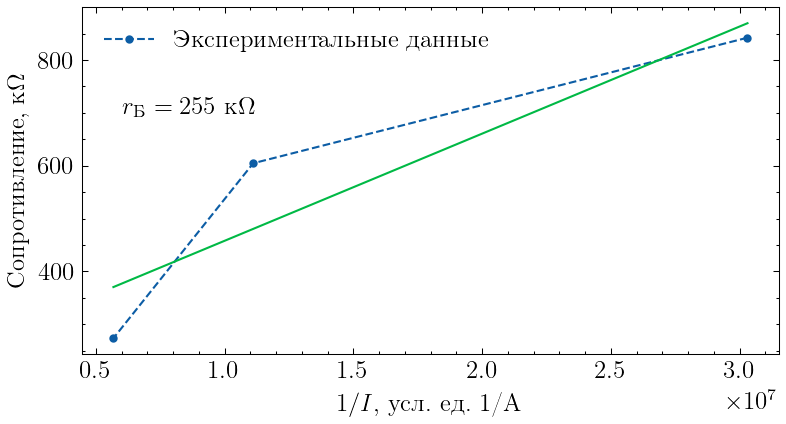

In [12]:
U = data_semi[10:14].T[0]*1e-3
I = data_semi[10:14].T[1]*1e-6

R = np.diff(U) / np.diff(I)
revI = 1/I[:-1]

line = lambda x, k, b: k * x + b
popt, pcov = curve_fit(line, revI, R)

plt.plot(revI, R*1e-3, "--.", label="Экспериментальные данные")
plt.plot(revI, line(revI, *popt)*1e-3)
plt.text(.6e7, 700, r"$r_\text{Б} = " + fr"{popt[1]*1e-3:.0f} " + r"\text{ к}\Omega$")
plt.xlabel(r"$1/I$, усл. ед. 1/А")
plt.ylabel(r"Сопротивление, $\text{к}\Omega$")
# plt.title(r"Зависимость $R = dU/dI$ от $1/I$ полупроводникового диода")
plt.legend()

plt.savefig("semi-R.png")
plt.show()

In [13]:
U

array([0.035, 0.083, 0.135, 0.184])